# Movie Recommender Using TF-IDF Vectorizer

The plan with this project is to understand the intuition behind the Term Frequency - Inverse Document Frequency (TF-IDF) Vectorizer and applying it to recommend movies based on the plot of the movie in the dataset.

The dataset used in this recommendation project is the TMDB 5000 Movie Dataset, from kaggle.

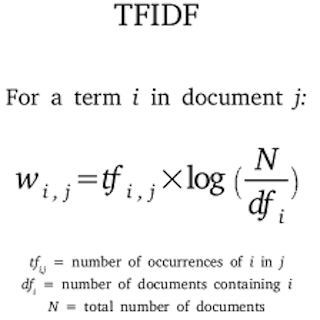

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

- t: term (word)
- d: document (set of words)
- N: count of corpus
- corpus: the total document set


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [19]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
credits.shape

(4803, 4)

In [22]:
movies.shape

(4803, 20)

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [24]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Checking for the null values in the dataframe

In [25]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [26]:
credits = credits.rename(index = str, columns = {"movie_id": "id"})

In [27]:
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Merging booth the datasets based on their id values.

In [28]:
df = movies.merge(credits, on = "id")

In [29]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [31]:
df = df.drop(columns = ["homepage", "title_x", "title_y", "status", "production_countries"], axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [33]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Content Based Recommendations based on the Overview of the Movie

We will use TF-IDF Vectorizer to help create a matrix of vectors, where each movie is a vector, and based on the similarity of the plot of the movie, the recommendations are made.

In [40]:
df.overview.head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(
    min_df = 3,
    max_features = None,
    strip_accents = "unicode",
    analyzer = "word",
    token_pattern = r'\w{1,}',
    ngram_range = (1,3),
    stop_words = "english"
)

df['overview'] = df['overview'].fillna('')

tfid_matrix = tfid.fit_transform(df['overview'])

tfid_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

min_df: Specifies the minimum number of documents a word must be present in to be included in the feature matrix. In this case, words that appear in fewer than 3 documents will be ignored.

max_features: Specifies the maximum number of features to be included in the feature matrix. If set to None, then all features will be included.

strip_accents: Specifies the method of stripping accents from the text. In this case, the "unicode" method will be used.

analyzer: Specifies whether to analyze the input as words or characters. In this case, the "word" analyzer will be used to tokenize the text into words.

token_pattern: Specifies the regular expression used to tokenize the text into words. In this case, it matches any sequence of one or more alphanumeric characters.

ngram_range: Specifies the range of n-grams to be included in the feature matrix. An n-gram is a contiguous sequence of n items from a given sample of text. In this case, n-grams of size 1, 2, and 3 will be included.

stop_words: Specifies a set of stopwords to be removed from the text. In this case, the built-in set of English stopwords will be used.

In [43]:
tfid_matrix.shape

(4803, 10417)

Transforming the input into values between 0 and 1 using the Sigmoid Kernal.

In [44]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfid_matrix, tfid_matrix)

sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

Setting index values for the titles of the movie

In [45]:
indices = pd.Series(df.index, index = df['original_title']).drop_duplicates()

In [46]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [48]:
print(indices['The Dark Knight Rises'])
print(sig[3])

3
[0.76159506 0.76159416 0.76159441 ... 0.76159558 0.76159573 0.76159616]


Converting the range of sigmoid values into a list using the enumerate function

In [49]:
list(enumerate(sig[indices['The Dark Knight Rises']]))

[(0, 0.761595063615533),
 (1, 0.7615941559557649),
 (2, 0.7615944078290156),
 (3, 0.7616344692549826),
 (4, 0.7615950457737669),
 (5, 0.7615945109930261),
 (6, 0.761595351099104),
 (7, 0.7615954025545779),
 (8, 0.7615950492974316),
 (9, 0.7616005190570759),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615943408120335),
 (16, 0.761595050859981),
 (17, 0.7615950693813743),
 (18, 0.7615944758122274),
 (19, 0.7615950260982076),
 (20, 0.761594578776274),
 (21, 0.7615962764817159),
 (22, 0.7615941559557649),
 (23, 0.7615944633567985),
 (24, 0.7615948702941228),
 (25, 0.7615953816484402),
 (26, 0.761594865414006),
 (27, 0.7615944920057011),
 (28, 0.7615945620746057),
 (29, 0.76159524105325),
 (30, 0.7615949630182212),
 (31, 0.7615955414163652),
 (32, 0.7615950267380301),
 (33, 0.7615944637218731),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615953800776539),
 (37, 0.7615944256

Sorting the list in descending order of similarity for recommendation purposes.

In [50]:
sorted(list(enumerate(sig[indices['The Dark Knight Rises']])), key = lambda x: x[1], reverse = True)

[(3, 0.7616344692549826),
 (299, 0.7616117241748959),
 (65, 0.7616093013272462),
 (1359, 0.7616074811809506),
 (428, 0.7616046156917416),
 (2507, 0.7616021343078877),
 (119, 0.7616011491947997),
 (1181, 0.7616005788334497),
 (9, 0.7616005190570759),
 (3854, 0.7616003472500156),
 (210, 0.7616000883164192),
 (879, 0.7615994760124272),
 (1202, 0.7615987773738875),
 (2193, 0.7615985703226479),
 (1349, 0.7615982185135821),
 (672, 0.7615981523409341),
 (1068, 0.7615980391647778),
 (4649, 0.7615978729274143),
 (2416, 0.7615978318361409),
 (1143, 0.7615977591088389),
 (1492, 0.7615975525063744),
 (3306, 0.7615975108794899),
 (647, 0.7615974971490003),
 (286, 0.761597396340469),
 (1984, 0.7615973834209395),
 (979, 0.7615973236308883),
 (1124, 0.7615972788717507),
 (1398, 0.7615971586762099),
 (281, 0.7615971470768436),
 (1766, 0.761597122545418),
 (777, 0.7615970905388133),
 (160, 0.7615970863811694),
 (1644, 0.761597054756466),
 (790, 0.7615969694224146),
 (614, 0.7615969515728843),
 (2529, 0.

Creating a function, that will return 5 movie titles similar to the movie title that has been used in the input.

In [53]:
def recommendations(title, sig = sig):
    index = indices[title]
    sig_scores = list(enumerate(sig[index]))
    sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
    
    sig_scores = sig_scores[1:6]
    movie_indices = [i[0] for i in sig_scores]
    
    return df['original_title'].iloc[movie_indices]

In [55]:
recommendations('Spectre')

1343    Never Say Never Again
29                    Skyfall
3162              Thunderball
4071    From Russia with Love
11          Quantum of Solace
Name: original_title, dtype: object

In [56]:
recommendations('John Carter')

1254                     Get Carter
4161    The Marine 4: Moving Target
2932                   Raising Cain
3349                      Desperado
1307                  The Hurricane
Name: original_title, dtype: object

In conclusion, I got to learn about TF-IDF Vectorizer and it's working. Thanks to the user CodeBreaker619 for reference 